In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#for feature scaling
from sklearn.preprocessing import StandardScaler

#for performing PCA
from sklearn.decomposition import PCA



In [2]:
data_dropout = pd.read_csv('dropout-ratio-2012-2015.csv')
data_gross = pd.read_csv('gross-enrollment-ratio-2013-2016.csv')
data_comps = pd.read_csv('percentage-of-schools-with-comps-2013-2016.csv')
data_electricity = pd.read_csv('percentage-of-schools-with-electricity-2013-2016.csv')
data_water_facility = pd.read_csv('percentage-of-schools-with-water-facility-2013-2016.csv')
data_boys_toilet = pd.read_csv('schools-with-boys-toilet-2013-2016.csv')
data_girls_toilet = pd.read_csv('schools-with-girls-toilet-2013-2016.csv')

location_dictionary = {'Andaman & Nicobar Islands':0, 'Andaman & Nicobar Islands':1,
 'Andaman & Nicobar Islands':2, 'Andhra Pradesh':3, 'Andhra Pradesh':4,
 'Andhra Pradesh':5, 'Arunachal Pradesh':6, 'Arunachal Pradesh':7,
 'Arunachal Pradesh':8, 'Assam':9, 'Bihar':10, 'Chandigarh':11, 'Chhattisgarh':12, 'Dadra & Nagar Haveli':13, 'Daman & Diu':14, 'Delhi':15,
 'Goa':16, 'Gujarat':17, 'Haryana':18, 'Himachal Pradesh':20, 'Jammu And Kashmir':21, 'Jharkhand':22, 'Karnataka':23,
 'Kerala':24, 'Lakshadweep':25, 'Madhya Pradesh':26, 'Maharashtra':27, 'Manipur':28, 'Meghalaya':29, 'Mizoram':30,
 'Nagaland':31,  'Odisha':32, 'Puducherry':33, 'Punjab':34, 'Rajasthan':35, 'Sikkim':36, 'Tamil Nadu':37, 'Telangana':38, 
 'Tripura':39, 'Uttar Pradesh':40,
 'Uttarakhand':41, 'West Bengal':42, 'All India':43}

def convert_to_int(val):
    return location_dictionary[val]

In [3]:
print("________________________________________Starting of Datasets_________________________________")
print()
print("\t\t\t_________________Dropout Ratio Dataset______________________")
print()
print(data_dropout.head())
print()
print("\t\t\t________________Gross Enrollment Dataset_______________________")
print()
print(data_gross.head())
print()
print("\t\t\t________________Percentage of Schools with Comps Dataset____________________")
print()
print(data_comps.head())
print()
print("\t\t\t___________________Percentage of Schools with Electricity_______________________")
print()
print(data_electricity.head())
print()
print("\t\t\t____________________Percentage of Schools with Water Facility______________________")
print()
print(data_water_facility.head())
print()
print("\t\t\t____________________Schools with Boys Toilets______________________")
print()
print(data_boys_toilet.head())
print()
print("\t\t\t__________________Schools with Girls Toilets_________________________")
print()
print(data_girls_toilet.head())
print("_______________________________________Ending Of Datasets_______________________________________")

________________________________________Starting of Datasets_________________________________

			_________________Dropout Ratio Dataset______________________

         State_UT     year Primary_Boys Primary_Girls Primary_Total  \
0   A & N Islands  2012-13         0.83          0.51          0.68   
1   A & N Islands  2013-14         1.35          1.06          1.21   
2   A & N Islands  2014-15         0.47          0.55          0.51   
3  Andhra Pradesh  2012-13          3.3          3.05          3.18   
4  Andhra Pradesh  2013-14         4.31          4.39          4.35   

  Upper Primary_Boys Upper Primary_Girls Upper Primary_Total Secondary _Boys  \
0     Uppe_r_Primary                1.09                1.23            5.57   
1                 NR                1.54                0.51            8.36   
2               1.44                1.95                1.69           11.47   
3               3.21                3.51                3.36           12.21   
4            

In [4]:
print("________________________________________Starting of Information of Datasets_________________________________")
print()
print("\t\t\t_________________Dropout Ratio Dataset______________________")
print()
print(data_dropout.info())
print()
print("\t\t\t________________Gross Enrollment Dataset_______________________")
print()
print(data_gross.info())
print()
print("\t\t\t________________Percentage of Schools with Comps Dataset____________________")
print()
print(data_comps.info())
print()
print("\t\t\t___________________Percentage of Schools with Electricity_______________________")
print()
print(data_electricity.info())
print()
print("\t\t\t____________________Percentage of Schools with Water Facility______________________")
print()
print(data_water_facility.info())
print()
print("\t\t\t____________________Schools with Boys Toilets______________________")
print()
print(data_boys_toilet.info())
print()
print("\t\t\t__________________Schools with Girls Toilets_________________________")
print()
print(data_girls_toilet.info())
print("_______________________________________Ending Of Information of Datasets_______________________________________")

________________________________________Starting of Information of Datasets_________________________________

			_________________Dropout Ratio Dataset______________________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   State_UT             110 non-null    object
 1   year                 110 non-null    object
 2   Primary_Boys         110 non-null    object
 3   Primary_Girls        110 non-null    object
 4   Primary_Total        110 non-null    object
 5   Upper Primary_Boys   110 non-null    object
 6   Upper Primary_Girls  110 non-null    object
 7   Upper Primary_Total  110 non-null    object
 8   Secondary _Boys      110 non-null    object
 9   Secondary _Girls     110 non-null    object
 10  Secondary _Total     110 non-null    object
 11  HrSecondary_Boys     110 non-null    object
 12  HrSecondary_Girls    110 non-

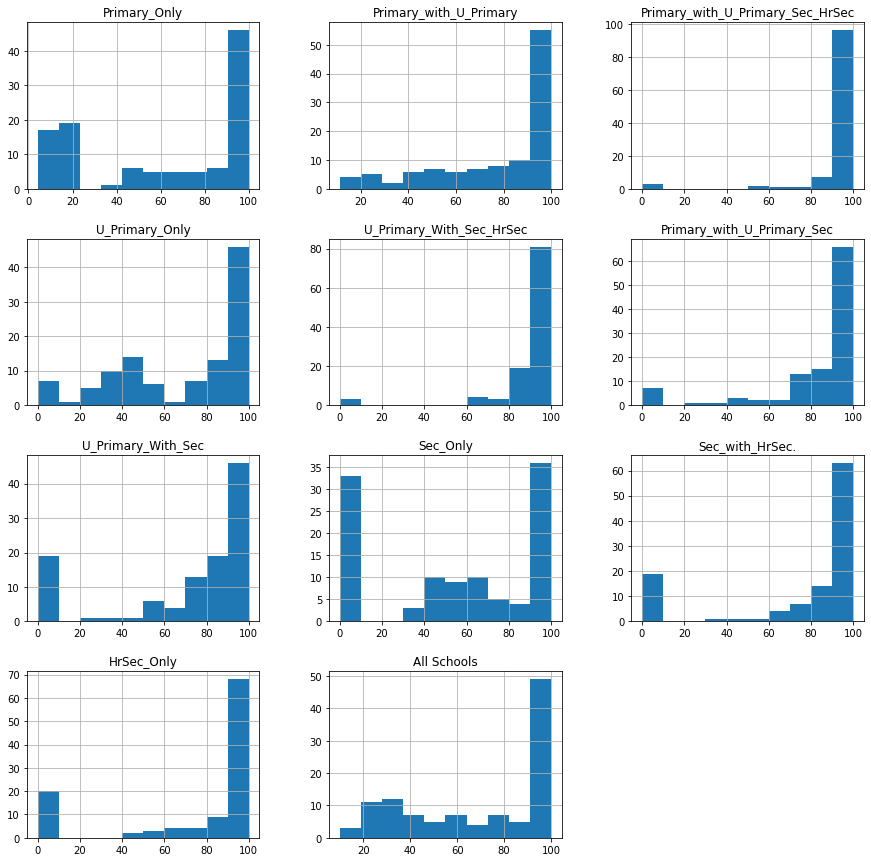

In [5]:
data_electricity.hist(figsize = (15, 15))
plt.show()

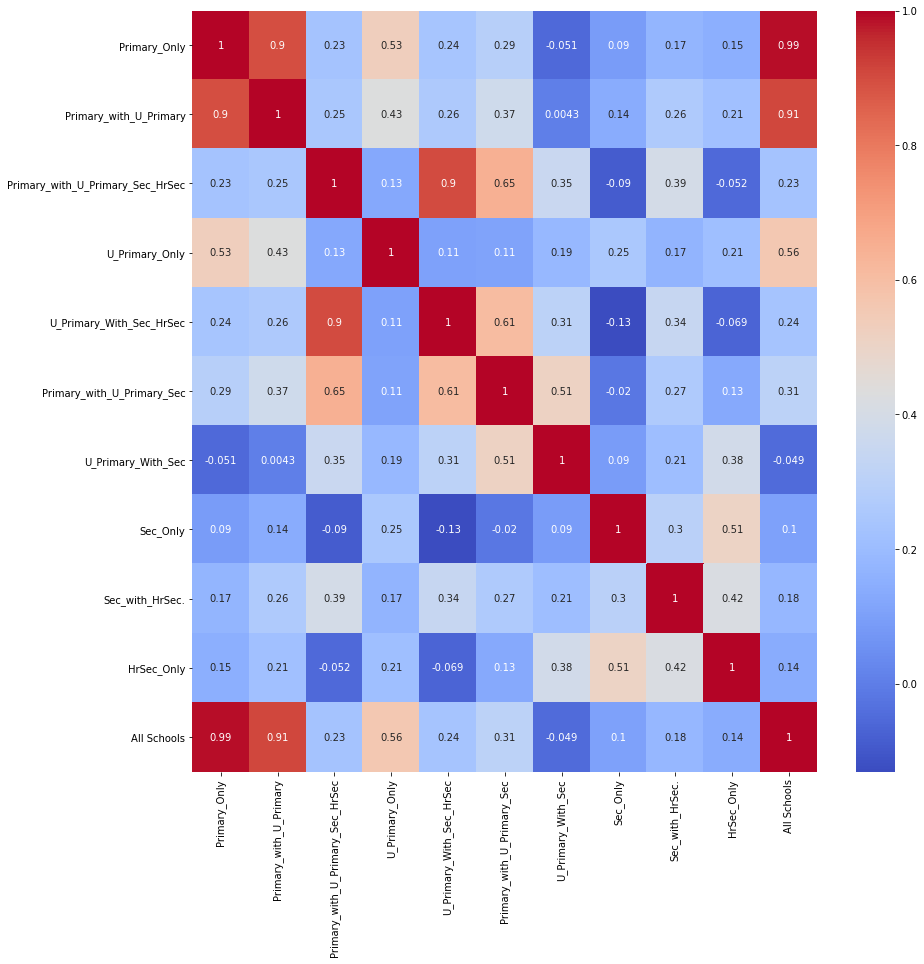

In [6]:
plt.figure(figsize = (14, 14))
sns.heatmap(data_electricity.corr(), annot = True, cmap = 'coolwarm')
plt.show()

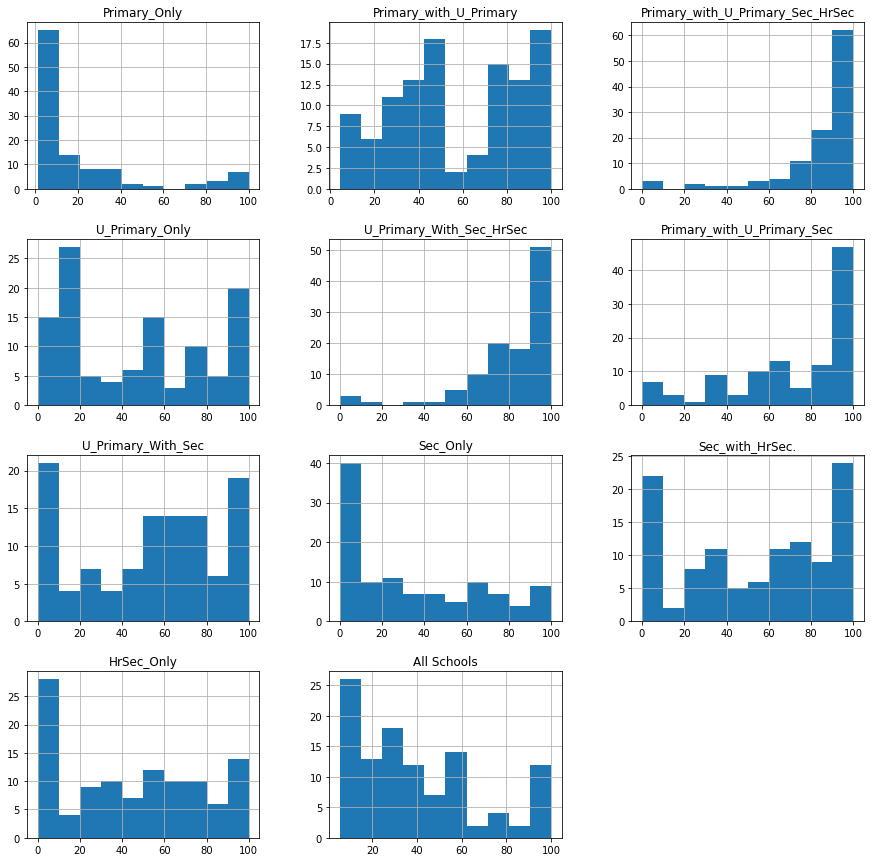

In [7]:
data_comps.hist(figsize = (15, 15))
plt.show()


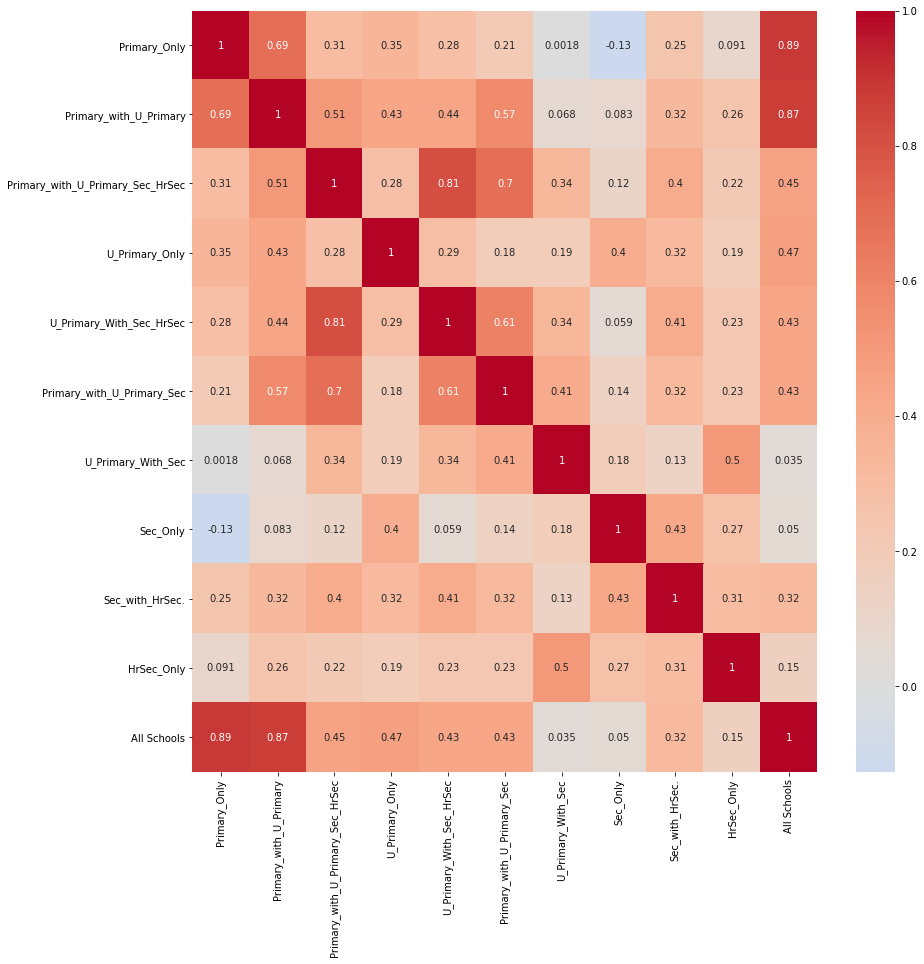

In [8]:
plt.figure(figsize = (14, 14))
sns.heatmap(data_comps.corr(), annot= True, cmap = 'coolwarm', center = 0)
plt.show()


In [9]:
data_electricity.isna().sum()

State_UT                            0
year                                0
Primary_Only                        0
Primary_with_U_Primary              0
Primary_with_U_Primary_Sec_HrSec    0
U_Primary_Only                      0
U_Primary_With_Sec_HrSec            0
Primary_with_U_Primary_Sec          0
U_Primary_With_Sec                  0
Sec_Only                            0
Sec_with_HrSec.                     0
HrSec_Only                          0
All Schools                         0
dtype: int64

In [10]:
data_electricity['State_UT'] = list(map(convert_to_int, data_electricity['State_UT']))
data_electricity.drop(columns=['year'], inplace=True, axis =1)
data_electricity


,State_UT,Primary_Only,Primary_with_U_Primary,Primary_with_U_Primary_Sec_HrSec,U_Primary_Only,U_Primary_With_Sec_HrSec,Primary_with_U_Primary_Sec,U_Primary_With_Sec,Sec_Only,Sec_with_HrSec.,HrSec_Only,All Schools
0,2,82.42,96.05,100.00,0.00,100.00,100.00,0.00,0.00,100.00,0.00,88.86
1,2,80.72,96.30,100.00,100.00,100.00,100.00,0.00,0.00,100.00,0.00,88.89
2,2,82.11,97.62,100.00,0.00,100.00,100.00,0.00,0.00,100.00,0.00,90.10
3,5,87.66,93.57,99.32,100.00,67.48,96.19,96.15,97.50,100.00,91.27,90.34
4,5,91.08,94.70,100.00,100.00,86.11,97.60,97.11,93.55,83.33,93.21,92.76
...,...,...,...,...,...,...,...,...,...,...,...,...
105,42,52.52,79.66,91.75,45.63,98.16,90.91,93.59,0.00,100.00,91.67,56.96
106,42,73.64,83.39,96.84,55.24,98.58,90.63,95.40,0.00,100.00,91.67,74.88
107,43,46.38,69.56,94.92,45.97,93.72,83.12,86.84,75.08,82.88,91.01,56.78
108,43,49.63,73.26,95.27,48.33,94.81,84.03,89.14,77.55,83.85,92.67,60.01


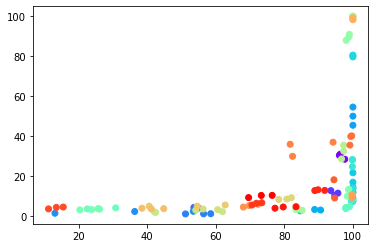

In [12]:
x_primary = data_electricity.iloc[:, 2].values
y_primary = data_comps.iloc[:, 2].values

plt.scatter(x_primary,y_primary,c=data_electricity.iloc[:, 0].values,cmap='rainbow')

In [13]:
store = []

for i in range(110):
    store.append([x_primary[i], y_primary[i]])
    
# store = pd.DataFrame(data=store)

store = np.array(store, np.float64)

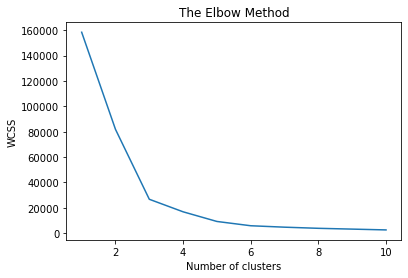

In [14]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(store)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(store)

In [16]:
y_kmeans

array([2, 2, 2, 4, 4, 4, 0, 0, 0, 0, 0, 0, 3, 3, 0, 2, 2, 2, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3,
       3, 3, 3, 3, 4, 4, 4, 1, 1, 1, 1, 1, 1, 4, 4, 4, 2, 2, 2, 3, 3, 0,
       0, 0, 0, 4, 0, 4, 0, 3, 0, 3, 3, 3, 1, 1, 1, 4, 4, 4, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 4, 4, 3, 3, 3, 0, 0, 0, 4, 4, 4, 0, 0, 4, 0, 0, 0],
      dtype=int32)

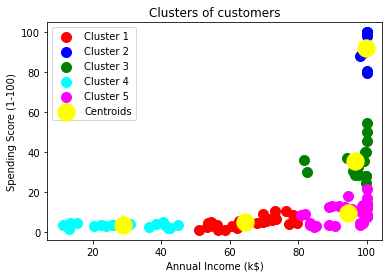

In [17]:
plt.scatter(store[y_kmeans==0,0],store[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(store[y_kmeans==1,0],store[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(store[y_kmeans==2,0],store[y_kmeans==2,1],s=100,c='green',label='Cluster 3')
plt.scatter(store[y_kmeans==3,0],store[y_kmeans==3,1],s=100,c='cyan',label='Cluster 4')
plt.scatter(store[y_kmeans==4,0],store[y_kmeans==4,1],s=100,c='magenta',label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [20]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(store)

y_kmeans

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

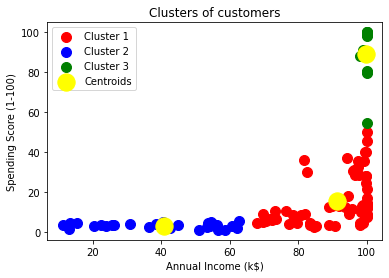

In [21]:
plt.scatter(store[y_kmeans==0,0],store[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(store[y_kmeans==1,0],store[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(store[y_kmeans==2,0],store[y_kmeans==2,1],s=100,c='green',label='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()